In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error, confusion_matrix, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import operator
from scipy.ndimage import gaussian_filter1d
from scipy.stats import multivariate_normal
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_loan_data = pd.read_csv('./datasets/Task 3 and 4_Loan_Data.csv')
df_loan_data

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0
...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0


In [3]:
min_fico, max_fico = df_loan_data['fico_score'].min(), df_loan_data['fico_score'].max()
min_fico, max_fico

(408, 850)

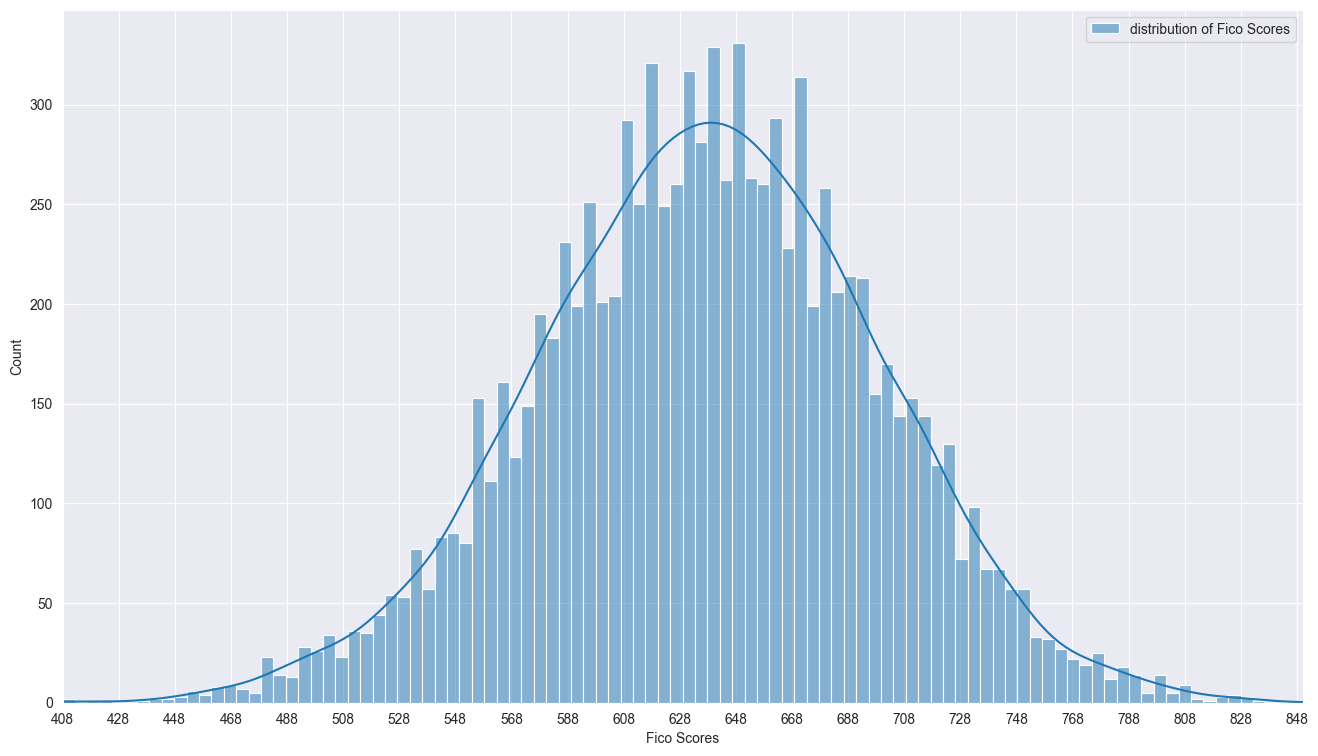

In [4]:
plt.figure(figsize=(16, 9))
sns.histplot(data=df_loan_data, x='fico_score', kde=True, bins=100, label='distribution of Fico Scores')
plt.xlim(min_fico, max_fico)
plt.xticks([i for i in range(min_fico, max_fico+1, 20)])
plt.xlabel('Fico Scores')
plt.legend()

Normally distributed

In [5]:
num_unique_entries_fico_score = len(df_loan_data['fico_score'].unique())
num_unique_entries_fico_score

374

In [6]:
X = np.array(df_loan_data['fico_score']).reshape(-1, 1)
X

array([[605],
       [572],
       [602],
       ...,
       [596],
       [647],
       [757]], dtype=int64)

In [7]:
len(df_loan_data['fico_score'])

10000

In [8]:
# max_clusters = num_unique_entries_fico_score + 50
# inertia_values = []
# bic_values = []
# mse_values_kmeans = []
# mse_values_gmm = []
# log_likelihood_values_gmm = []
# for i in range(2, max_clusters):
#     kmeans = KMeans(n_clusters=i, random_state=42).fit(X)
#     inertia_values.append(kmeans.inertia_)
#     mse_values_kmeans.append(mean_squared_error(X, kmeans.cluster_centers_[kmeans.labels_]))
#
#     gmm = GaussianMixture(n_components=i, random_state=42, warm_start=True, n_init=1).fit(X)
#     gmm_labels = gmm.predict(X)
#     bic_values.append(gmm.bic(X))
#     mse_values_gmm.append(mean_squared_error(X, gmm.means_[gmm_labels]))
#     log_likelihood_values_gmm.append(np.sum(np.log([multivariate_normal.pdf(X[j], mean=gmm.means_[gmm_labels[j]], cov=gmm.covariances_[gmm_labels[j]]) for j in range(len(X))])))
# log_likelihood_values_gmm

NameError: name 'max_clusters' is not defined

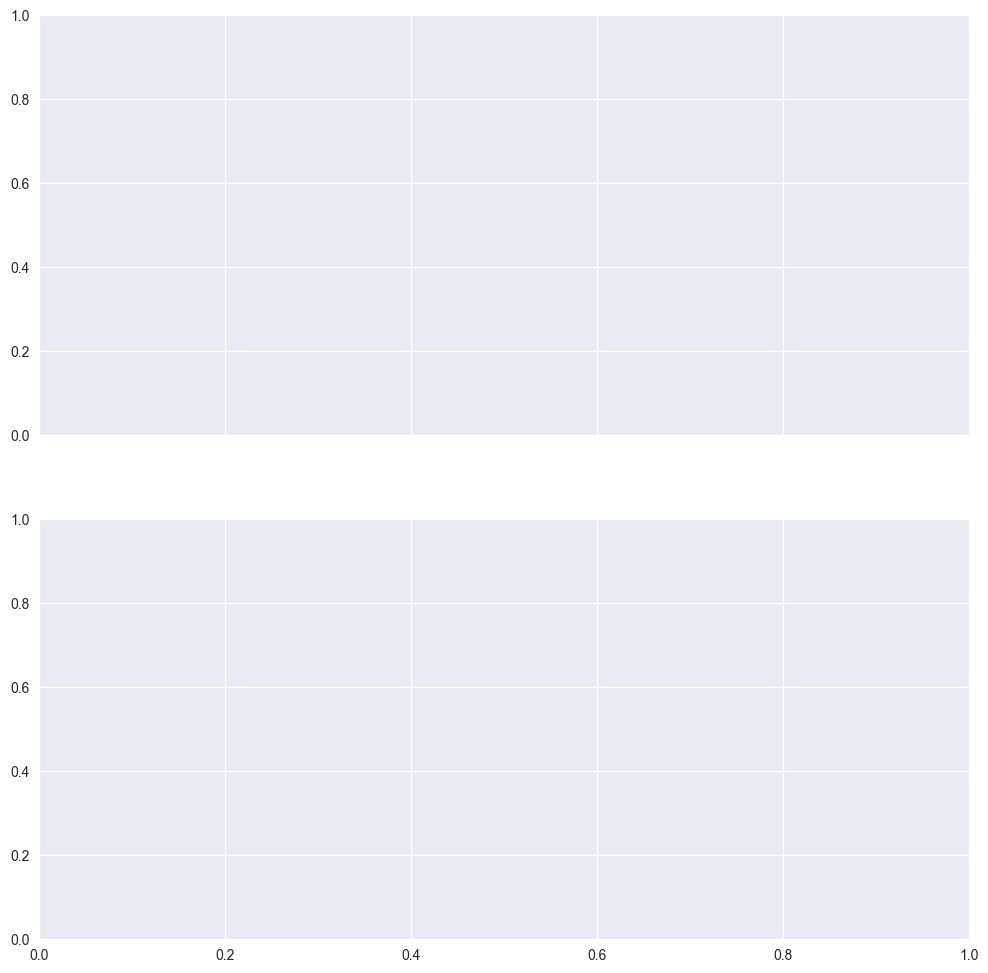

In [9]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(12, 12))
sns.lineplot(x=range(2, max_clusters), y=inertia_values, marker='o', color='b', ci=0, label="KMeans' inertia", ax=ax[0])
sns.lineplot(x=range(2, max_clusters), y=bic_values, markers='o', color='orange', ci=0, label="Gaussian Mixture Models' bic score", ax=ax[1])
plt.suptitle('Goodness of fit for Different Numbers of Clusters of FICO score')
plt.xlabel('Number of Clusters')
ax[0].xaxis.set_major_locator(plt.MaxNLocator(nbins=50))
ax[1].tick_params(axis='x', rotation=90)
ax[0].set_ylim(0, 1e6)
ax[0].set_ylabel('Inertia')
ax[1].xaxis.set_major_locator(plt.MaxNLocator(nbins=50))
ax[1].set_xlim(2, 423)
ax[1].set_ylim(0, 1.2e5)
ax[1].set_ylabel('BIC score')

50 or 240 clusters

In [ ]:
df_bic_values = pd.DataFrame(bic_values)
df_bic_values

In [ ]:
df_bic_values.idxmin()

In [ ]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(12, 12))
sns.lineplot(x=range(2, max_clusters), y=mse_values_kmeans, marker='o', color='b', ci=0, label="KMeans' MSE", ax=ax[0])
sns.lineplot(x=range(2, max_clusters), y=mse_values_gmm, markers='o', color='orange', ci=0, label="Gaussian Mixture Models' MSE", ax=ax[1])
plt.suptitle('Goodness of fit for Different Numbers of Clusters of FICO score')
plt.xlabel('Number of Clusters')
ax[0].xaxis.set_major_locator(plt.MaxNLocator(nbins=50))
ax[1].tick_params(axis='x', rotation=90)
ax[0].set_ylim(0, 1300)
ax[0].set_ylabel('MSE')
ax[1].xaxis.set_major_locator(plt.MaxNLocator(nbins=50))
ax[1].set_ylim(0, 1300)
ax[1].set_xlim(2, 50)
ax[1].set_ylabel('MSE')

13 clusters

In [ ]:
plt.figure(figsize=(16, 9))
sns.lineplot(x=range(2, max_clusters), y=log_likelihood_values_gmm, label="Gaussian Mixture's Log-likelihood")
plt.title('Goodness of fit for Different Numbers of Clusters of FICO score')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=50))
plt.tick_params(axis='x', rotation=90)
plt.xlim(2, 150)
plt.xlabel('Number of Clusters')
plt.ylim(-5e4, 0)
plt.ylabel('Log-Likelihood')

142 clusters

In [12]:
gmm_final = GaussianMixture(n_components=13, max_iter=2000, n_init=20, random_state=42).fit(X)
gmm_final

GaussianMixture(max_iter=2000, n_components=13, n_init=20, random_state=42)

In [13]:
gmm_final.predict(df_loan_data['fico_score'].values.reshape(-1, 1))


array([ 1, 10,  1, ...,  1, 12,  9], dtype=int64)

In [ ]:
df_fico_score_rating = pd.DataFrame(
    {'fico_score': df_loan_data['fico_score'],
     'rating': gmm_final.predict(df_loan_data['fico_score'].values.reshape(-1, 1)).astype('int')}
)
df_fico_score_rating

In [ ]:
df_fico_score_rating_sorted = df_fico_score_rating.set_index('fico_score').sort_index()
df_fico_score_rating_sorted

In [ ]:
unique_ratings = df_fico_score_rating_sorted['rating'].unique().tolist()
unique_ratings

In [ ]:
mapping_dict = {rating: i + 1 for i, rating in enumerate(unique_ratings)}
mapping_dict

In [ ]:
df_fico_score_rating_sorted['rating'] = df_fico_score_rating_sorted['rating'].map(mapping_dict)
df_fico_score_rating_sorted

In [ ]:
df_fico_score_rating_sorted.info()

In [ ]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df_fico_score_rating_sorted, x='fico_score', y='rating', hue='rating', palette='seismic', legend='full')
plt.title('Scatter Plot of FICO Scores and Ratings')
plt.xlabel('FICO Score')
plt.xlim(min_fico, max_fico)
plt.xticks([i for i in range(min_fico, max_fico+1, 20)])
plt.ylabel('Rating')
plt.yticks([i for i in range(0, 13+1)])